# <span style='color:#689038'>PROJET - Concevez une application au service de la santé publique </span>

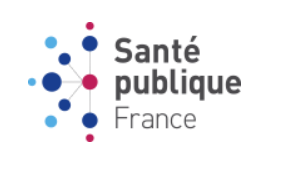

## <span style=''>1. Introduction</span>

*****
**Mission**
*****
L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.



*****
**Objectifs**
*****
- Explorer des données à l'aide de language Python.
- Repérant des variables pertinentes pour les traitements.
- Nettoyer une base de données d'un format important (> 2 Go).
- Faire des analyses statistiques univariées et multivariées pour émettre des hypothèses
- Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Réfléchissant à une idée d’application.
 - Rédiger un rapport d’exploration.
- Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- 

*****
**Sources**
*****
- [Jeu de données](https://world.openfoodfacts.org/)

- [Téléchargement direct des données ](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip)

*****
**Processus EDA** 
***

Pour l'analyse des données, nous allons suivre les étapes suivantes :
**Analyse de la forme** : 
- [x]  Nous allons d'abord vérifier les **statistiques de base** comme :
    - le nombre d'enregistrements dans les tables, 
    - le nombre de caractéristiques,
    - Types de variables
    - le nombre de valeurs NaN, etc.
- [x] Analyse de fond :
    - Compréhension des différentes variables (https://world.openfoodfacts.org/data/data-fields.txt)


Nous utiliserons les graphiques suivants :
- [x] Pour les caractéristiques catégorielles, nous utiliserons principalement des diagrammes à barres et des diagrammes circulaires.
- [x] Pour les caractéristiques continues/numériques, nous utiliserons des Box-Plots, des Probability Density Function ([PDF](https://towardsdatascience.com/what-is-a-probability-density-function-d9b4b8bea121) [PDF](https://towardsdatascience.com/probability-distribution-functions-demystified-a6e882759af3)), des Cumulative Density Function [CDF](https://pub.towardsai.net/pdf-cdf-in-machine-learning-5a10f7abeef6) [CDF](https://sandeepdubey001.medium.com/pdf-probability-density-function-and-cdf-cumulative-distribution-function-a6a48945739e) et des Violin-Plots.

Enfin, nous tirerons des observations de chaque graphique et noterons les idées importantes générées par les graphiques.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [17]:
dico_pd_option = {
    'display.max_rows': 400,
    'display.max_column': 100,
    'display.width': 300,
    'display.precision': 4,
    'display.max_colwidth': 1000,
    'mode.chained_assignment': None
    #     # pandas DataFrame column and row display limits
    #     'max_columns': None,
    #     'max_rows': None,
    #     'display.max_colwidth': 800
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)

In [3]:
pwd

'C:\\Users\\lenovo\\Openclassrooms\\PSanté_nom_prenom'

## <span style='background:Thistle'> Jeux de données</span>

In [4]:
df = pd.read_csv('C:/Users/lenovo/data/fr.openfoodfacts.org.products.csv',sep='\t', iterator=True, chunksize= 200000,low_memory=False)

In [3]:
df

In [5]:
df = pd.concat([chunk for chunk in df]) 

# 1. Description des données

In [18]:
nRow, nCol = df.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 2027269 lignes et 187 colonnes.


In [19]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,origins_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_fr,...,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-fr.openfoodfacts.org/produit/00000000000003429145/l-casei,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,en:spain,Espagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,en:spain,Espagne,"Leche semidesnatada, azucar 6.9% leche desnatada en polva, fermentos lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-fr.openfoodfacts.org/produit/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-fr.openfoodfacts.org/produit/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-fr.openfoodfacts.org/produ

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027269 entries, 0 to 2027268
Columns: 187 entries, code to carnitine_100g
dtypes: float64(125), int64(2), object(60)
memory usage: 2.8+ GB


In [10]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=187)

In [13]:
# Nombre de pays 
print('Nombre de pays :', len(df['countries'].unique()))

Nombre de pays : 10519


In [20]:
df['countries'] = df['countries'].str.lower()
df['countries'] = df['countries'].str.capitalize()


In [21]:
df['countries'].unique().tolist()

['En:france',
 'Spain',
 'France',
 'Espagne',
 'En:es',
 'En:united states',
 'En:fr',
 'United states',
 'Irlande',
 nan,
 'En:be',
 'United kingdom',
 'États-unis, en:france',
 'France, united states',
 'France,états-unis',
 'España',
 'En:ivory coast',
 'Canada',
 'Suisse',
 'En:it',
 'Germany',
 'France,belgique',
 'Belgium',
 'France, états-unis',
 'Pérou',
 'En:germany',
 'En:united-kingdom',
 'Schweiz',
 'Oman',
 'Deutschland',
 'Slovenia',
 'En:de',
 'Frankreich, deutschland',
 'France,germany,netherlands',
 'En:kw',
 'ફ્રાન્સ',
 'En:spain',
 'En:ae',
 'En:united kingdom',
 'France,switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'Italy',
 'Romania',
 'En:us',
 'Australia',
 'En:norway',
 'En:ch',
 'Us',
 'En:lu',
 'En:united arab emirates',
 'En:italy',
 'Portugal',
 'En:mexico',
 'En:dominican republic',
 'En:re',
 'En:ireland',
 'En:gb',
 'En:canada',
 'United kingdom,en:united-kingdom',
 'Israel',
 'En:netherlands',
 'Royaume-uni',
 'Belgique,france',
 'En:ca',
 'En:

Certains pays ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom.

In [22]:
# Modification des chaînes de caractères en lien avec les pays
countries_translate ={
    "France" : "France",
    "Francia" : "France",
    "Frankreich" : "France",
    "fr" : "France",
    "Germany" : "Allemagne",
    "Deutschland" : "Allemagne",
    "de" : "Allemagne",
    "España" : "Espagne",
    "Spain" : "Espagne",
    "en:es" : "Espagne",
    "United States" : "Etats-Unis",
    "USA" : "Etats-Unis",
    "Us" : "Etats-Unis",
    "United Kingdom" : "Royaume-Uni",
    "united-kingdom" : "Royaume_Uni",
    "England" : "Angleterre",
    "Scotland" : "Ecosse",
    "Ireland" : "Irlande",
    "Wales" : "Pays de Galles",
    "Polska" : "Pologne",
    "México" : "Mexique",
    "mexico" : "Mexique",
    "Belgium" : "Belgique",
    "be" : "Belgique",
    "Netherlands" : "Pays-Bas",
    "Magyarország" : "Hongrie",
    "Hungary" : "Hongrie",
    "new caledonia" : "Nouvelle-Calédonie",
    "Switzerland" : "Suisse",
    "Sverige" : "Suède",
    "Sweden" : "Suède",
    "Norway" : "Norvège",
    "Norge" : "Norvège",
    "Suomi" : "Finlande",
    "Finland" : "Finlande",
    "Bulgaria" : "Bulgarie",
    "България" : "Bulgarie",
    "Bǎlgarija" : "Bulgarie",
    "Россия" : "Russie",
    "Russia" : "Russie",
    "Italy" : "Italie",
    "Italia" : "Italie",
    "Thailand" : "Thaïlande",
    "Canada" : "Canada",
    "Brazil" : "Brésil",
    "Réunion" : "France",
    "Républik kongo" : "République du Congo",
    "Republik kongo" : "République du Congo",
    "Congo" : "République du Congo",
    "Mo" : "Macao",
    "malaysia" : "Malaisie",
    "my" : "Malaisie",
    "singapore" : "Singapour",
    "Jemen" : "Yémen",
    "mali" : "Mali",
    "Burkina faso" : "Burkina Faso",
    "En:sr" : "Singapour",
    "En:ye" : "Yémen",
    "Nueva zelanda" : "Nouvelle-Zélande",
    "New Zealand" : "Nouvelle-Zélande",
    "Taiwan" : "Taiwan",
    "Sn" : "Sénégal",
    "Senegal" : "Sénégal",
    "Grecia" : "Grèce",
    "Ελλάδα " : "Grèce",
    "Nueva caledonia" : "Nouvelle Calédonie",
    "lu" : "Luxembourg",
    "united-states" : "Etats-Unis",
    "En:it" : "Italie",
    "En:ivory coast" : "Cote d'Ivoire",
    "Schweiz" : "Suisse",
    "Slovenia" : "Slovénie",
    "ફ્રાન્સ" : "France",
    "En:ae" : "Emirats arabes unis",
    "united arab emirates" : "Emirats arabes unis",
    "dominican republic" : "République dominicaine",
    "En:re" : "France",
    "En:gb" : "Royaume-Uni",
    "Great Britain" : "Royaume-Uni",
    "En:ch" : "Suisse",
    "En:ca" : "Canada",
    "saudi arabi" : "Arabie Saoudite",
    "Romania" : "Roumanie",
    "En:pl" : "Pologne",
    "Chile" : "Chili",
    "En:el salvador" : "Salvador",
    "En:luxembourg" : "Luxembourg",
    "luxemburg" : "Luxembourg",
    "Stati uniti d'america" : "Etats-Unis",
    "En:ie" : "Irlande",
    "En:ad" : "Andorre",
    "royaume-uni" : "Royaume-Uni",
    "sv" : "Salvador",
    "En:jersey" : "Jersey",
    "jersey" : "Jersey",
    "En:gi" : "Gibraltar",
    "República dominicana" : "République dominicaine",
    "En:hk" : "Hong Kong",
    "En:mu" : "Ile Maurice",
    "En:uk" : "Royaume-Uni",
    "En:cr" : "Costa Rica",
    "En:portugal" : "Portugal",
    "Vereinigte staaten von amerika" : "Etats-Unis",
    "En: kuweit" : "Koweit",
    "En:hn" : "Honduras",
    "En:au" : "Australie",
    "En:at" : "Autriche",
    "En:pr" : "Porto Rico",
    "En:mc" : "Macao",
    "Hrvatska" : "Croatie",
    "En:egypt" : "Egypte",
    "Égypte" : "Egypte",
    "En:mx" : "Mexique",
    "En:pakistan" : "Pakistan",
    "En:pm" : "France",
    "En:pa" : "Panama",
    "En:ma" : "Maroc",
    "澳大利亚" : "Australie",
    "En:do" : "République dominicaine",
    "Estados unidos" : "Etats-Unis",
    "السعودية" : "Arabie Saoudite",
    "Saudi-arabien" : "Arabie Saoudite",
    "العراق" : "Iraq",
    "En:sa" : "Arabie Saoudite",
    "En:om" : "Oman",
    "gp" : "France",
    "pf" : "France",
    "El-salvador" : "Salvador",
    "En:indonesia" : "Indonésie",
    "الكويت" : "Koweit",
    "colombia" : "Colombie",
    "Martinique" : "France",
    "Guadeloupe" : "France",
    "Guyane" : "France",
    "En:czechia" : "République Tchèque",
    "En:puerto rico" : "Puerto Rico",
    "美国" : "Etats-Unis",
    "En:sg" : "Singapour",
    "Reino unido" : "Royaume-Uni",
    "En:lb" : "Liban",
    "En:costa rica" : "Costa Rica",
    "En:tt" : "Trinité-Et-Tobago",
    "En:ve" : "Venuezela",
    "En:israel" : "Israël",
    "israel" : "Israel",
    "Saudi-arabia" : "Arabie Saoudite",
    "Panamá" : "Panama",
    "En:isle of man" : "Royaume-Uni",
    "En:nc" : "Nouvelle-Calédonie",
    "En:bs" : "Bahamas",
    "En:nl" : "Pays-Bas",
    "En:jm" : "Jamaïque",
    "Jamaique" : "Jamaïque",
    "Jamaica" : "Jamaïque",
    "ประเทศฝรั่งเศส" : "France",
    "En:iraq":"Iraq",
    "En:ke" : "Kenya",
    "Jordan" : "Jordanie",
    "Poland" : "Pologne",
    "En:honduras" : "Honduras",
    "لولايات المتحدة" : "Etats-Unis",
    "En:hong kong": "Hong Kong",
    "Prancūzija" : "France",
    "Vereinigtes königreich" : "Royaume-Uni",
    "En:guinea" : "Guinée",
    "En:algeria" : "Algérie",
    "法国" : "France",
    "香港" : "Hong Kong",
    "Hong kong" : "Hong Kong",
    "Costa-rica" : "Costa Rica",
    "En:nz" : "Nouvelle-Zélande",
    "En:ghana" : "Ghana",
    "En:yt" : "France",
    "Wielka brytania" : "Royaume-Uni",
    "Maurice" : "Ile Maurice",
    "En:sc" : "Seychelles",
    "En:ecuador" : "Equateur",
    "En:cl" : "Chili",
    "中华人民共和国" : "Chine",
    "ประเทศไทย" : "Thaïlande",
    "En:pt" : "Portugal",
    "En:vi" : "Etats-Unis",
    "En:cm" : "Cameroun",
    "En:mk" : "Macédoine",
    "En:qa": "Qatar",
    "En:qatar" : "Qatar",
    "En:venezuela" : "Venézuela",
    "China" : "Chine",
    "en:greece" : "Grèce",
    "en:th" : "Thaïlande",
    "en:vietnam" : "Vietnam",
    "Suisse" : "Suisse",
    "En:gt" : "Guatemala",
    "En:mq" : "France",
    "Serbia" : "Serbie",
    "En:jp" : "Japon",
    "En:in" : "Inde",
    "America" : "Etats-Unis",
    "En:niger" : "Niger",
    "Panama" : "Panama",
    "En:japan" : "Japon",
    "En:barbados" : "Barbades",
    "En:lybia" : "Lybie",
    "En:poland" : "Pologne",
    "En:je" : "Jersey",
    "En:co" : "Colombie",
    "Riunione" : "France",
    "Bahreïn" : "Bahreïn",
    "En:mm" : "Birmanie",
    "En:haiti" : "Haïti",
    "En:pk" : "Pakistan",
    "En:afghanistan" : "Afghanistan",
    "En:gh" : "Ghana",
    "En:suriname" : "Suriname",
    "Γαλλία" : "France",
    "Trinidad and Tobago" : "Trinité-Et-Tobago",
    "En:south korea" : "Corée du Sud",
    "En:jo" : "Jordanie",
    "En:hr" : "Croatie", 
    "En:sm" : "Saint-Marin",
    "San Marin" : "Saint-Marin",
    "الإمارات العربية المتحدة" : "Emirats arabes unis",
    "En:lybia" : "Lybie",
    "India" : "Inde",
    "En:guyana" : "Guyana",
    "En:antigua and barbuda" : "Antigua-et-Barbuda",
    "Espagne" : "Espagne",
    "En:py" : "Paraguay",
    "Bolivia" : "Bolivie",
    "En:tw" : "Taiwan",
    "En:kw" : "Koweit",
    "Mexique" : "Mexique",
    "Polen" : "Pologne",
    "Argentina":"Argentine",
    "The bahamas" : "Bahamas",
    "Perú" : "Pérou",
    "En:dz" : "Algérie",
    "Puerto Rico" : "Porto Rico",
    "En:ml" : "Mali",
    "Andorra" : "Andorre",
    "Suiza" : "Suisse",
    "Puerto-rico" : "Porto Rico",
    "En:gf" : "France",
    "En:bb" : "Barbade",
    "En:dj" : "Djibouti",
    "En:cw" : "Curaçao",
    "Danmark" : "Danemark",
    "En:ht" : "Haïti",
    "En:bm" : "Bermudes",
    "En:U.s." : "Etats-Unis",
    "En:U.s" : "Etats-Unis",
    "U.s." : "Etats-Unis",
    "U.s" : "Etats-Unis",
    "Mexico" : "Mexique",
    "En:iq" :"Iraq",
    "En:ai" : "Anguilla",
    "En:bq" : "Pays-Bas caribéens",
    "En:gd" : "Grenade",
    "Česko" : "République Tchèque",
    "Lebanon" : "Liban",
    "En:philippines" : "Philippines",
    "En:ro" : "Roumanie",
    "En:kazakhstan" : "Kazakhstan",
    "En:kaz" : "Kazakhstan",
    "En:kz" : "Kazakhstan",
    "En:ge" : "Géorgie",
    "Georgia" : "Géorgie",
    "Argentina" : "Argentine",
    "En:ar" : "Argentine",
    "En:bahrain" : "Bahreïn",
    "Japan" : "Japon",
    "En:aruba" : "Aruba",
    "Україна" : "Ukraine",
    "En:sx" : "Saint-Marin",
    "ประเทศสเปน" : "Espagne",
    "Франция" : "France",
    "En:tn" : "Tunisie",
    "Tunisia" : "Tunisie",
    "En:lc" : "Sainte-Lucie",
    "Saint-Pierre-et-Miquelon" : "France",
    "Saint Pierre et Miquelon" : "France",
    "Royaume_Uni" : "Royaume-Uni",
    "En:kuwait" : "Koweit",
    "Saint martin" : "Saint-Martin",
    "加拿大" : "Canada",
    "Kanada" : "Canada",
    "Österreich" : "Autriche",
    "En:cz" : "République Tchèque",
    "Saint Pierre and miquelon" : "France",
    "Meksico" : "Mexique",
    "كندا" : "Canada",
    "Canadá" : "Canada",
    "Канада" : "Canada",
    "En:gn" : "Guinée",
    "Sierra leone" : "Sierra Leone",
    "États-unis" : "Etats-Unis",
    "En:ua" : "Ukraine",
    "En:ci" : "Cote d'Ivoire",
    "En:la" : "Laos",
    "En:cd" : "République du Congo",
    "Ecuador" : "Equateur",
    "Mexiko" : "Mexique",
    "Espanya" : "Espagne",
    "România" : "Roumanie",
    "En:gg": "Guernesey",
    "En:bh": "Bahreïn",
    "En:is": "Islande",
    "フィンランド" : "Finlande",
    "Czech republic" : "République Tchèque",
    "Hungary" : "Hongrie",
    "En:peru" : "Pérou",
    "En:uruguay" : "Uruguay",
    "England" : "Royaume-Uni",
    "En:se" : "Suède",
    "En:ph" : "Philippines",
    "Turkey" : "Turquie",
    "En:il" : "Israël",
    "Ungaria" : "Hongrie",
    "En:iran" : "Iran",
    "En:northern mariana islands" : "Îles Mariannes du Nord",
    "En:guatemala" : "Guatemala",
    "En:pe" : "Pérou",
    "En:cg" : "République du Congo",
    "European Union" : "Union européenne",
    "Hongkong" : "Hong Kong",
    "الأردن" : "Jordanie",
    "Србија" : "Serbie",
    "En:eg" : "Egypte",
    "Egypt" : "Egypte",
    "Indonesia" : "Indonésie",
    "Cambodia" : "Cambodge",
    "En:brunei" : "Brunei",
    "En:ec" : "Equateur",
    "En:no" : "Norvège",
    "En:grenada" : "Grenade",
    "En:zm" : "Zambie",
    "Albania" : "Albanie",
    "Iceland" : "Islande",
    "En:kh" : "Cambodge",
    "Бельгія" : "Belgique",
    "Portugal" : "Portugal",
    "En:gr" : "Grèce",
    "Algeria" : "Algérie",
    "En:sudan" : "Soudan",
    "En:ss" : "Soudan du Sud",
    "En:bj" : "Bénin",
    "Dinamarca" : "Danemark",
    "En:mt" : "Malte",
    "En:br" : "Brésil",
    "En:md" : "",
    "Greece" : "Grèce",
    "En:azerbaijan" : "Azerbaidjan" ,
    "En:fi" : "Fidji",
    "En:vn" : "Vietnam",
    "Ελλάδα" : "Grèce",
    'Peru' : "Pérou",
    "Sri lanka" : "Sri Lanka",
    'En:kyrgyzstan' : "Kyrgyzstan",
    'En:rs' : "Sénégal",
    'Unión europea' : "Union Européenne",
    "ישראל" : "Gabon",
    "jp" : "Japon",
    "en:sa" : "Arabie Saoudite",
    "za" : "Afrique du Sud",
    "Bélgica" : "Belgique",
    "Fi" : "Finlande",
    'Cameroon' : "Cameroun",
    "Messico" : "Mexique",
    'En:nicaragua' : "Nicaragua",
    'En:kn' : "Saint-Kitts-et-Nevis",
    'En:id' : "Indonésie",
    'En:ne' : "Niger",
    'En:bg' : "Bulgarie",
    "تونس" : "Tunisie",
    "Kw" : "Koweit",
    "Sa" : "Arabie Saoudite",
    "En:mr" : "Mauritanie",
    "En:tr" : "Turquie",
    "Bb" : "Barbades",
    "Ue" : "Union Européenne",
    "En:rwanda" : "Rwanda",
    "En:np" : "Népal",
    "Fi" : "Finlande",
    "Ru" : "Russie",
    "الجزائر" : "Algérie",
    "Autriche" : "Autriche",
    "Hellas" : "Grèce",
    "en:km" : "Comores",
    "no" : "Norvège",
    "en:bd" : "Bangladesh",
    "Nepal" : "Népal",
    "لبنان" : "Liban",
    "Kowait" : "Koweit",
    "en:ethyopia" : "Ethiopie",
    "Coronaponpis" : "Espagne",
    "Angleterre" : "Royaume-Uni",
    "Italien" : "Italie",
    "Alemania" : "Allemagne",
    "En:gabon" : "Gabon",
    "البرتغال" : "Portugal",
    "Slovénie" : "Slovénie",
    "Hong-Kong" : "Hong Kong",
    "En:angola" : "Angola",
    "Lietuva" : "Lituanie",
    "En:guam" : "Guam",
    "En:tg" : "Togo",
    "nan"    : "NA",
    "NA" : "NA",
    "NAN":"NA"
}

In [23]:
for key, value in countries_translate.items():
    df["countries"].loc[df["countries"].str.contains(key, case=False, regex=False,na=False)] = value

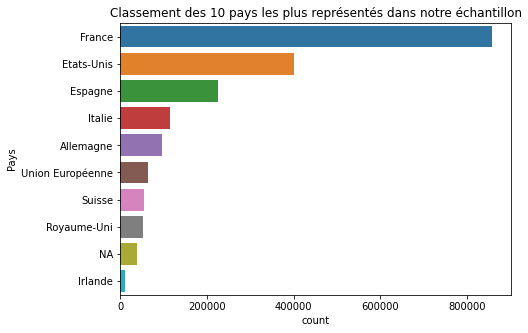

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(y="countries", data=df, order=pd.value_counts(df['countries']).iloc[:10].index)
plt.ylabel("Pays")
plt.title("Classement des 10 pays les plus représentés dans notre échantillon")
plt.show()

# 1) l'analyse des données uniquement pour la France

In [27]:
#Pour  notre étude, on va se pencher sur l'analyse des données uniquement pour la France.
df = df[df['countries'] == 'France']

In [28]:
df.shape

(857709, 187)

# 2) Traitement des informations redondantes

*****
**NOTE**
*****
On va retrouver deux types de redondances dans nos données :
<li>Celles qui correspondent à des colonnes dont les noms sont différents mais donnent la même information (les colonnes _fr ou _tags par exemple)</li>
<li>Celles qui correspondent à des entrées multiples</li>
Dans un premier temps, nous allons nous créer une liste avec les noms des colonnes à supprimer (avec le suffixe _fr ou _tags). Ensuite, on cherchera à supprimer les données dupliquées à l'aide des méthodes spécifiques des dataframes Pandas.

In [29]:
df[['last_modified_t','last_modified_datetime','packaging','packaging_tags','origins','origins_tags','labels','labels_tags','labels_fr']]

,last_modified_t,last_modified_datetime,packaging,packaging_tags,origins,origins_tags,labels,labels_tags,labels_fr
0,1623855209,2021-06-16T14:53:29Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1561463718,2019-06-25T11:55:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1539464817,2018-10-13T21:06:57Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1444659212,2015-10-12T14:13:32Z,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,Delois-france
8,1560020173,2019-06-08T18:56:13Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2027261,1624357822,2021-06-22T10:30:22Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027264,1572513866,2019-10-31T09:24:26Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027265,1608105504,2020-12-16T07:58:24Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027267,1613129730,2021-02-12T11:35:30Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## A - Suppression des colonnes redondantes et catégories manquantes

*****
**NOTE**
*****
On supprime les colonnes redondantes avec un suffixe</br>
Mais aussi celle contenant les urls des images des produits ainsi que les stamps de datetime<br>
On supprime les lignes dont les valeurs de nutrition grade et nutrition score sont manquantes

In [31]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'origins_fr',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

In [32]:
drop_cols = ["created_t","last_modified_t","brands_tags","categories_tags","categories_fr","origins_tags","origins_fr","manufacturing_places_tags","labels_tags","labels_fr","emb_codes_tags","cities_tags","countries_tags","countries_fr","allergens_fr","traces_tags","traces_fr","additives_tags","ingredients_that_may_be_from_palm_oil_tags","states_tags","states_fr","main_category_fr","image_url","image_small_url","image_ingredients_url","image_ingredients_small_url","image_nutrition_url","image_nutrition_small_url"]
df.drop(drop_cols, axis=1, inplace=True)

In [33]:
df.shape

(857709, 159)

# B - Suppression des entrées multiples

In [34]:
# affichage des entrées multiples dans notre dataset
df[df.duplicated()]


,code,url,creator,created_datetime,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities,purchase_places,stores,countries,ingredients_text,allergens,traces,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,energy-kj_100g,energy-kcal_100g,energy_100g,...,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g


# 3) Traitement des données manquantes 

In [38]:
# 1. Nombre de valeurs manquantes totales
tot_nan = df.isna().sum().sum()
nb_donnees_tot = np.product(df.shape)
pourc_nan_tot = round((tot_nan / nb_donnees_tot) * 100, 2)
print(f'Valeurs manquantes : {tot_nan} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

Valeurs manquantes : 115869217 NaN pour 136375731 données (84.96 %)


In [37]:
# 2. Visualisation du nombre et du pourcentage de valeurs manquantes# par variable
values = df.isnull().sum()
percentage = 100 * values / len(df)
table = pd.concat([values, percentage.round(2)], axis=1)
table.columns = ['Nombres de valeurs manquantes','% de valeurs manquantes']
display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values('% de valeurs manquantes', ascending=False)
                .style.background_gradient('YlOrRd'))

,Nombres de valeurs manquantes,% de valeurs manquantes
mead-acid_100g,857706,100.0000
elaidic-acid_100g,857709,100.0000
caprylic-acid_100g,857706,100.0000
capric-acid_100g,857705,100.0000
lauric-acid_100g,857697,100.0000
myristic-acid_100g,857704,100.0000
palmitic-acid_100g,857698,100.0000
stearic-acid_100g,857706,100.0000
behenic-acid_100g,857691,100.0000
lignoceric-acid_100g,857701,100.0000


## A) Supprimer colonnes avec 70 des données manquantes

In [42]:
table.index

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 'carnitine_100g'],
      dtype='object', length=159)

In [43]:
#les colonnes avec 70 des données manquantes
for column in table.index:
    if df[column].isnull().sum()*100.0/df.shape[0] > 70:
        df.drop(column,1, inplace=True)
        

In [44]:
df.shape

(857709, 31)

## B) Ne conservez que les lignes comportant au moins 21 valeurs non-NA.

In [45]:
#Ne conservez que les lignes comportant au moins 21 valeurs non-NA.
df = df.dropna(thresh=21)

In [46]:
df.shape

(404039, 31)

In [47]:
df.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'categories', 'labels', 'countries', 'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states', 'main_category', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [48]:
df.dropna(subset=['product_name'], inplace=True) 
df.dropna(subset=['nutriscore_grade'],inplace = True)
df.dropna(subset=['nutriscore_score'],inplace = True)

In [50]:
df.shape

(308147, 31)

Heatmap de visualisation des valeurs manquantes


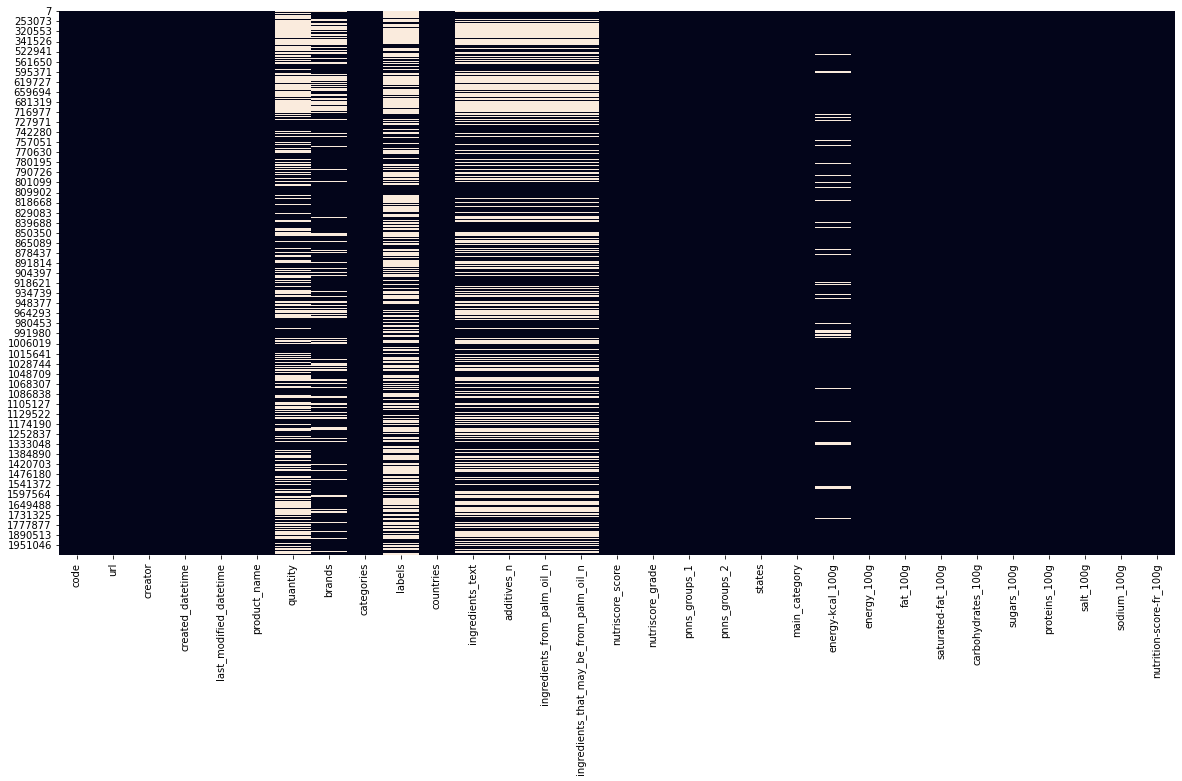

In [51]:
print("Heatmap de visualisation des valeurs manquantes")
# 3. Heatmap de visualisation des valeurs manquantes
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)
plt.show()

<AxesSubplot:>

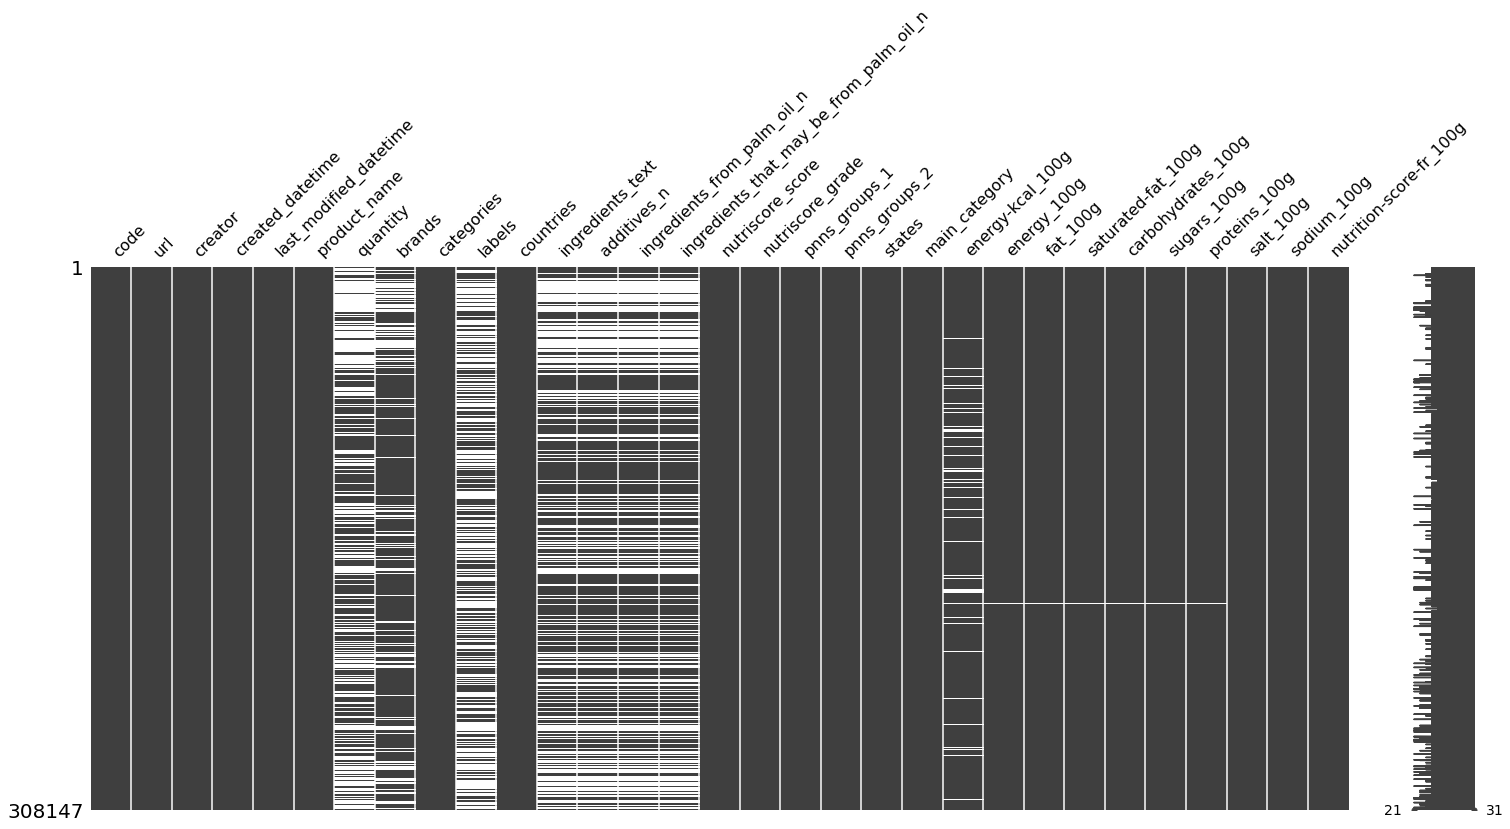

In [52]:
%matplotlib inline
msno.matrix(df)

# 4) Détections et corrections des abberantes


Pour détecter les anomalies et identifier le type de correction à effectuer, on va commencer par les visualiser à l'aide de boîtes à moustaches.<br>
Pour étayer cette analyse, on va aussi générer un tableau contenant les différentes informations statistiques pour mieux identifier la nature de nos anomalies.

### A) Visualisation et identification des anomalies

<li>Détection graphique</li>

 Création des boîtes à moustache pour détecter les anomalies des variables quantitatives

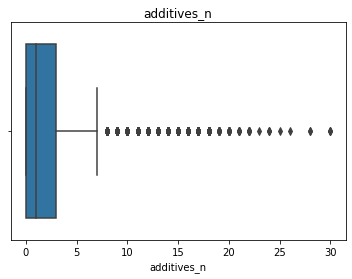

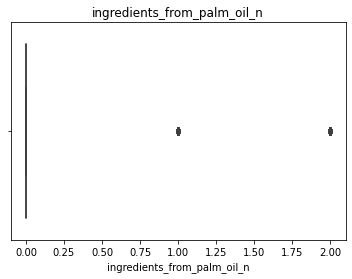

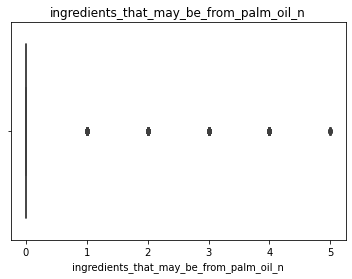

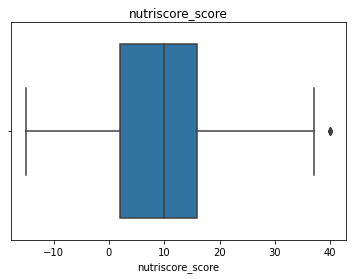

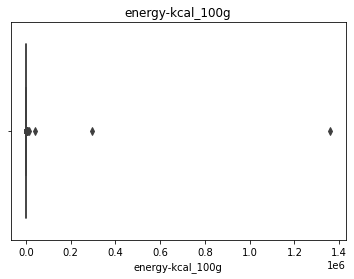

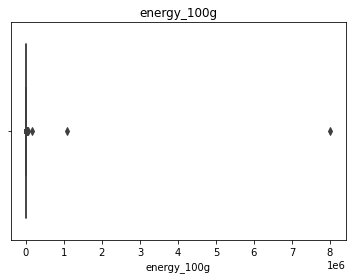

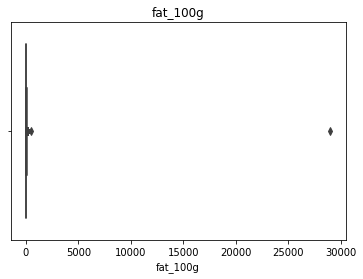

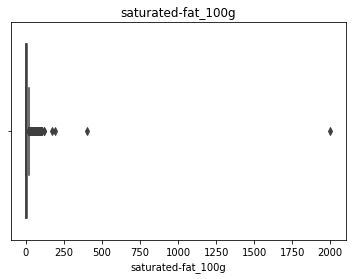

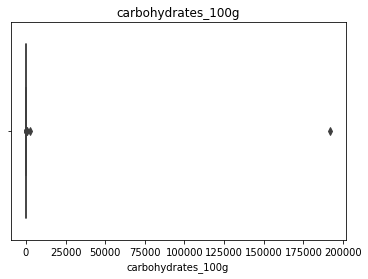

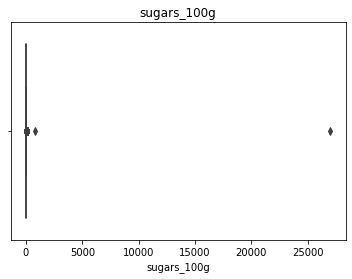

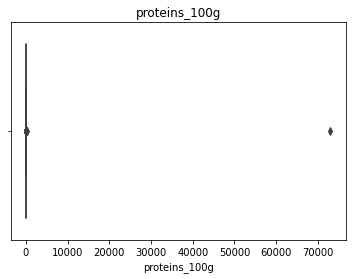

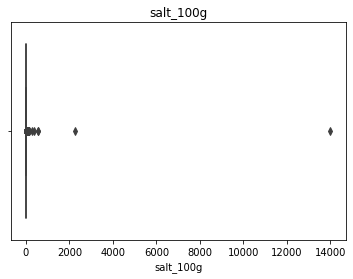

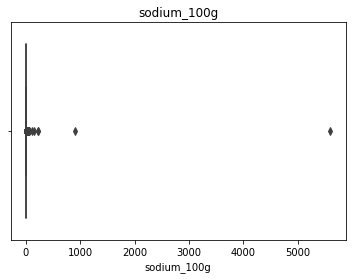

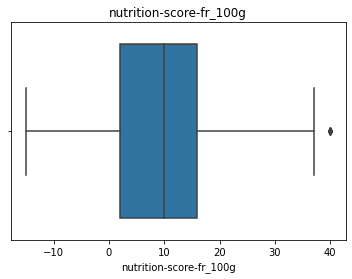

In [27]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.title(var)
        plt.show()

<li> Détection numérique </li>

In [53]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,176310.0000,176310.0000,176310.0000,308147.0000,2.8644e+05,3.0782e+05,307814.0000,307813.0000,307708.0000,307814.0000,307818.0000,307879.0000,307879.0000,308147.0000
mean,1.7090,0.0477,0.1262,9.4467,2.8816e+02,1.2010e+03,15.5954,5.9028,25.0535,12.2510,9.3502,1.1098,0.4441,9.4467
std,2.3708,0.2162,0.4221,8.7604,2.6087e+03,1.4596e+04,55.5746,9.3729,347.1277,52.0115,131.8754,25.7091,10.2840,8.7604
min,0.0000,0.0000,0.0000,-15.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,-1.0000,-1.0000,0.0000,0.0000,0.0000,-15.0000
25%,0.0000,0.0000,0.0000,2.0000,1.1900e+02,4.9400e+02,1.5000,0.3000,1.9000,0.5100,2.0000,0.0850,0.0340,2.0000
50%,1.0000,0.0000,0.0000,10.0000,2.5800e+02,1.0670e+03,9.0000,2.3000,11.7000,3.0000,6.5000,0.6000,0.2400,10.0000
75%,3.0000,0.0000,0.0000,16.0000,4.0300e+02,1.6820e+03,24.0000,8.7000,48.1000,15.6000,14.0000,1.3000,0.5200,16.0000
max,30.0000,2.0000,5.0000,40.0000,1.3600e+06,8.0100e+06,29000.0000,2000.0000,192000.0000,27000.0000,73000.0000,14000.0000,5600.0000,40.0000


### B) Anomalie liée à la nature des données

*****
**NOTE**
*****
Les données nutritives étant pour 100g, elles ne peuvent pas excéder 100g.<br>
Les aliments les plus caloriques ne peuvent contenir que 900 calories au maximum.
*****
**Procédure**
*****
- On va  supprimer les valeurs superieures à 100g pour les carbohydrates, le sucre, les fibres, les protéines, le sel et le sodium.
- On va  supprimer les valeurs supérieures à 900 kcal et inférieure à 0 en ce qui concerne l'énergie en kcal.
- on va aussi supprimer les valeurs qui sont inférieures à 0

In [64]:
data_clean = df.copy()


In [55]:
data_clean.shape

(308147, 31)

In [56]:
cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g','salt_100g', "proteins_100g", "sodium_100g"]

for col in cols : 
    ind = data_clean.loc[(data_clean[col] < 0) | (data_clean[col] > 100)].index.to_list()
    data_clean.drop(index=ind, inplace=True)

In [57]:
data_clean.shape

(308114, 31)

In [58]:
data_clean.shape

(308114, 31)

In [59]:
cols = ["energy-kcal_100g"]

for col in cols : 
    ind = data_clean.loc[(data_clean[col] < 0) | (data_clean[col] > 900)].index.to_list()
    data_clean.drop(index=ind, inplace=True)

In [60]:
cols = ["nutrition-score-fr_100g"]

for col in cols : 
    ind = data_clean.loc[(data_clean[col] < -15) | (data_clean[col] > 40)].index.to_list()
    data_clean.drop(index=ind, inplace=True)

In [61]:
data_clean.shape

(307423, 31)

## C) Vérification du traitement

<li> Vérification numérique </li>

In [62]:
data_clean.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,176035.0000,176035.0000,176035.0000,307423.0000,285725.0000,3.0710e+05,307091.0000,307090.0000,306985.0000,307091.0000,307095.0000,307155.0000,307155.0000,307423.0000
mean,1.7090,0.0477,0.1262,9.4255,279.8026,1.1659e+03,15.4804,5.8860,24.4170,12.1618,9.1056,1.0499,0.4201,9.4255
std,2.3703,0.2162,0.4221,8.7523,192.0350,2.1289e+03,18.9157,8.5931,26.5447,18.3542,9.0972,2.4458,0.9824,8.7523
min,0.0000,0.0000,0.0000,-15.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-15.0000
25%,0.0000,0.0000,0.0000,2.0000,119.0000,4.9200e+02,1.5000,0.3000,1.9000,0.5400,2.0000,0.0850,0.0340,2.0000
50%,1.0000,0.0000,0.0000,10.0000,258.0000,1.0670e+03,9.0000,2.3000,11.7000,3.0000,6.5000,0.6000,0.2400,10.0000
75%,3.0000,0.0000,0.0000,16.0000,402.0000,1.6740e+03,24.0000,8.7000,48.0000,15.6000,14.0000,1.3000,0.5200,16.0000
max,30.0000,2.0000,5.0000,40.0000,900.0000,1.0943e+06,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,49.9872,40.0000


<li>.Vérification graphique</li>

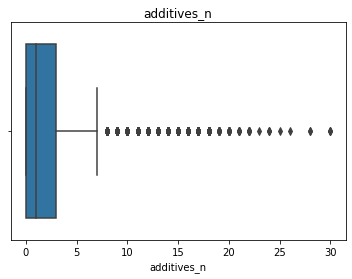

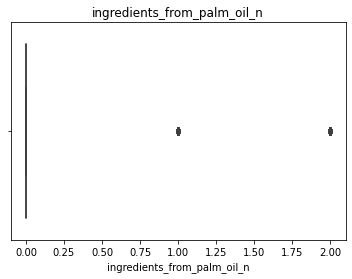

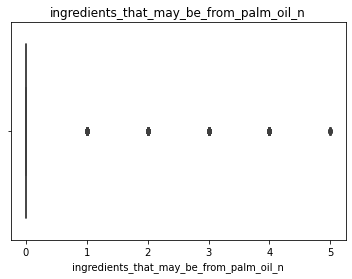

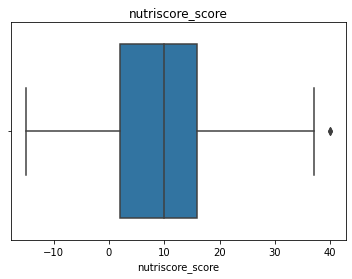

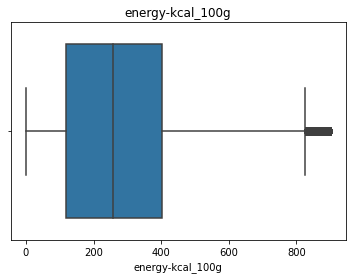

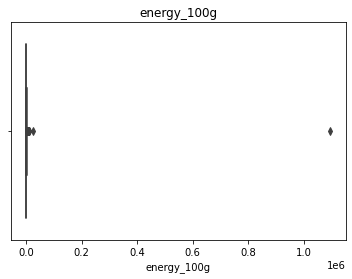

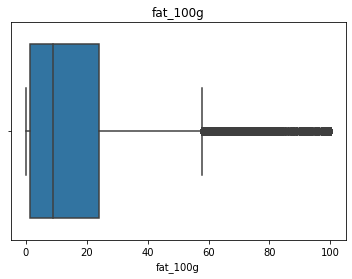

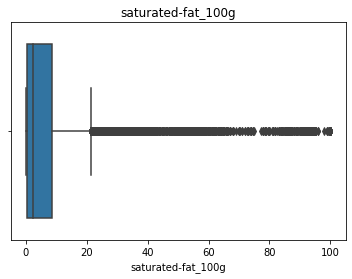

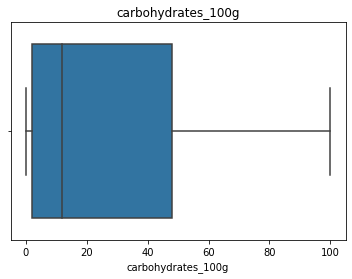

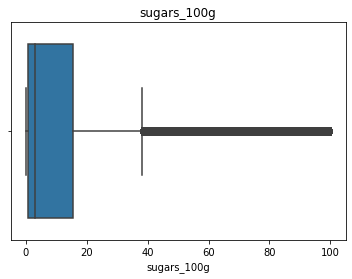

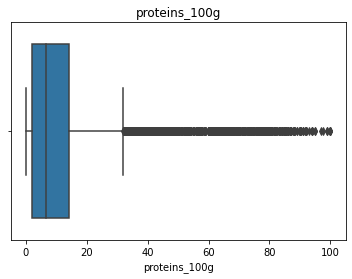

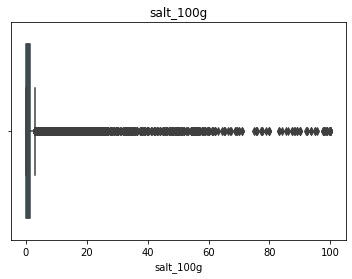

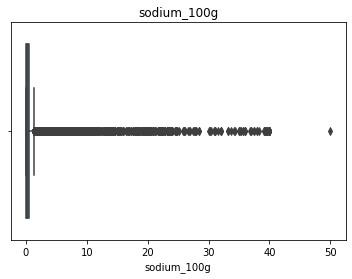

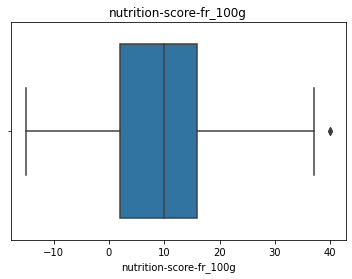

In [63]:
for var in data_clean.columns:
    if data_clean[var].dtypes == 'float64':
        sns.boxplot(x=var, data=data_clean)
        plt.title(var)
        plt.show()

In [39]:
data_clean.to_csv("C:/Users/lenovo/data/openfoodfacts_clean_data.csv", index=False)